In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
#𝑦=−0.5𝑥^2+4.5𝑥−9.0

In [2]:
dataset=datasets.load_iris()
print(dataset.feature_names)
print(dataset.data[:10])
print(dataset.target_names)
print(dataset.target[:5])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0]


In [3]:
data=pd.DataFrame(data=dataset.data,columns=dataset.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
#Checking stats of the dataset
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

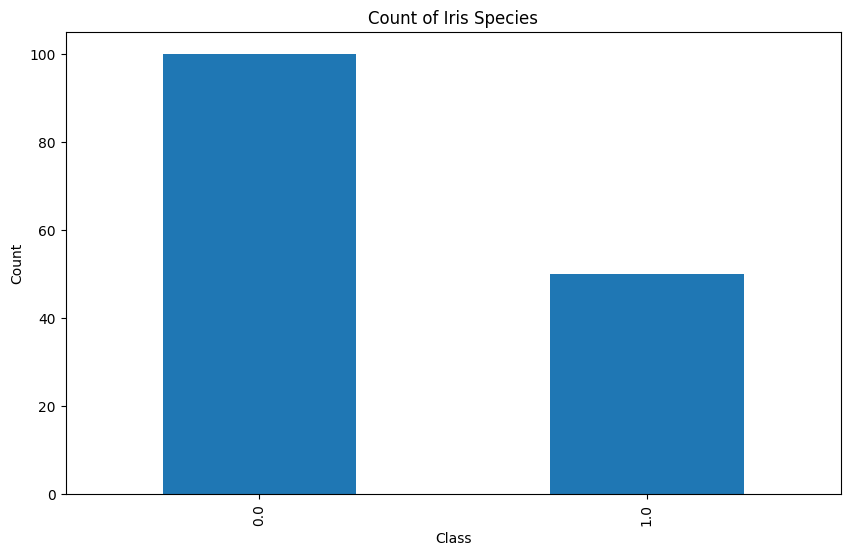

In [6]:
#Bringing all columns to the same distribution
scaler=MinMaxScaler()
X=scaler.fit_transform(data)
y=dataset.target

#Y is currently a multiclass target set. Converting it to binary
y=(y==2)*1.0
class_counts=pd.Series(y).value_counts()
plt.figure(figsize=(10,6))
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Iris Species')
plt.show()
y=y.reshape((150,1))

In [7]:
X_train,X_val,y_train,y_val=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=42,shuffle=True)

In [8]:
def initialize_weights(dim):
    w=np.random.randn(dim,1)
    b=0
    return w,b

def sigmoid(z):
    s=1/(1+np.exp(-z))
    return s

def logistic_regression(w,X,b):
    z=np.dot(X,w)+b
    s=sigmoid(z)
    return s

In [9]:
def cost_function(y_hat,y):
    m=len(y)
    log_error=-1*(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))
    cost=np.sum(log_error)/m
    return cost

def gradients(y_hat,y,X):
    m=len(y)
    dw=np.dot(X.T,y_hat-y)/m
    db=np.sum(y_hat-y)/m

    return dw,db

In [10]:
def train_loop(X,y,num_iterations,learning_rate,print_costs=False):
    costs=[]
    w,b=initialize_weights(X.shape[1])
    for i in range(num_iterations):
        y_hat=logistic_regression(w,X,b)
        # print(y_hat.shape)
        # print(y.shape)
        costs.append(cost_function(y_hat,y))
        if i%100==0:
            print(f"Cost after {i} iterations:{cost_function(y_hat,y)}")

        dw,db=gradients(y_hat,y,X)
        w=w-(learning_rate*dw)
        b=b-(learning_rate*db)
    
    return w,b,costs

w,b,costs=train_loop(X_train,y_train,1000,0.1,True)

Cost after 0 iterations:0.7669375030457407
Cost after 100 iterations:0.45952709715892354
Cost after 200 iterations:0.41210269710642056
Cost after 300 iterations:0.380143150219837
Cost after 400 iterations:0.35671270437025127
Cost after 500 iterations:0.3384910438391453
Cost after 600 iterations:0.32370602779307683
Cost after 700 iterations:0.31132762307527834
Cost after 800 iterations:0.30071478404774843
Cost after 900 iterations:0.2914459444469882


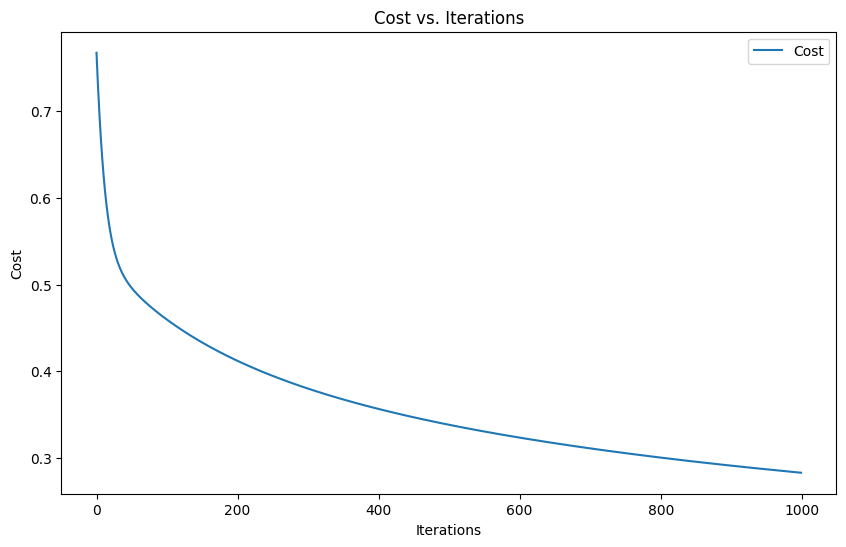

In [11]:
plt.figure(figsize=(10, 6)) 
plt.plot(range(len(costs)), costs, label='Cost') 
plt.xlabel('Iterations') 
plt.ylabel('Cost') 
plt.title('Cost vs. Iterations') 
plt.legend() 
plt.show()

Accuracy Score:  0.9666666666666667
F1 Score:  0.9565217391304348
Precision Score:  1.0
Recall Score:  1.0


<Axes: >

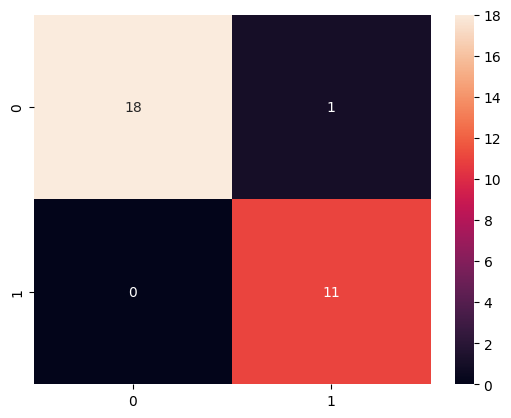

In [12]:
def predict(w,X,b):
    y_hat=logistic_regression(w,X,b)
    preds=(y_hat>=0.5)*1.0
    preds=preds.reshape(X.shape[0],1)
    return preds

preds=predict(w,X_val,b)
conf_matrix=confusion_matrix(y_val,preds)
print("Accuracy Score: ",accuracy_score(y_val,preds))
print("F1 Score: ",f1_score(y_val,preds))
print("Precision Score: ",precision_score(preds,y_val))
print("Recall Score: ",recall_score(y_val,preds))
sns.heatmap(conf_matrix,annot=True)

In [13]:
def accuracy_score(y_true, y_pred):
    # Calculate the number of correct predictions
    correct = sum([1 for true, pred in zip(y_true, y_pred) if true == pred])
    # Calculate the total number of predictions
    total = len(y_true)
    # Calculate the accuracy
    accuracy = correct / total
    return accuracy

def precision_score(y_true, y_pred):
    # Calculate the number of true positives
    tp = sum([1 for true, pred in zip(y_true, y_pred) if true == 1.0 and pred == 1.0])
    # Calculate the number of false positives
    fp = sum([1 for true, pred in zip(y_true, y_pred) if true == 0.0 and pred == 1.0])
    # Calculate the precision
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    return precision

def recall_score(y_true, y_pred):
    # Calculate the number of true positives
    tp = sum([1 for true, pred in zip(y_true, y_pred) if true == 1 and pred == 1])
    # Calculate the number of false negatives
    fn = sum([1 for true, pred in zip(y_true, y_pred) if true == 1 and pred == 0])
    # Calculate the recall
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    return recall

def f1_score(y_true, y_pred):
    # Calculate precision and recall
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    # Calculate the F1 score
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return f1


print("Accuracy:", accuracy_score(y_val, preds))
print("Precision:", precision_score(y_val, preds))
print("Recall:", recall_score(y_val, preds))
print("F1 Score:", f1_score(y_val, preds))


Accuracy: 0.9666666666666667
Precision: 0.9166666666666666
Recall: 1.0
F1 Score: 0.9565217391304348
